In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 32
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1338 		 0.1 		 0.1 |
| 2563 		 0.1 		 0.1 |
| 2215 		 0.1 		 0.1 |
| 1445 		 0.1 		 0.1 |
| 1411 		 0.1 		 0.1 |
| 1478 		 0.1 		 0.1 |
| 3009 		 0.1 		 0.1 |
| 6128 		 0.1 		 0.1 |
| 3281 		 0.1 		 0.1 |
| 2377 		 0.1 		 0.1 |
| 1135 		 0.1 		 0.1 |
| 791 		 0.1 		 0.1 |
| 4731 		 0.1 		 0.1 |
| 1559 		 0.1 		 0.1 |
| 2102 		 0.1 		 0.1 |
| 1005 		 0.1 		 0.1 |
| 561 		 0.1 		 0.1 |
| 2273 		 0.1 		 0.1 |
| 195 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 1293.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1821
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


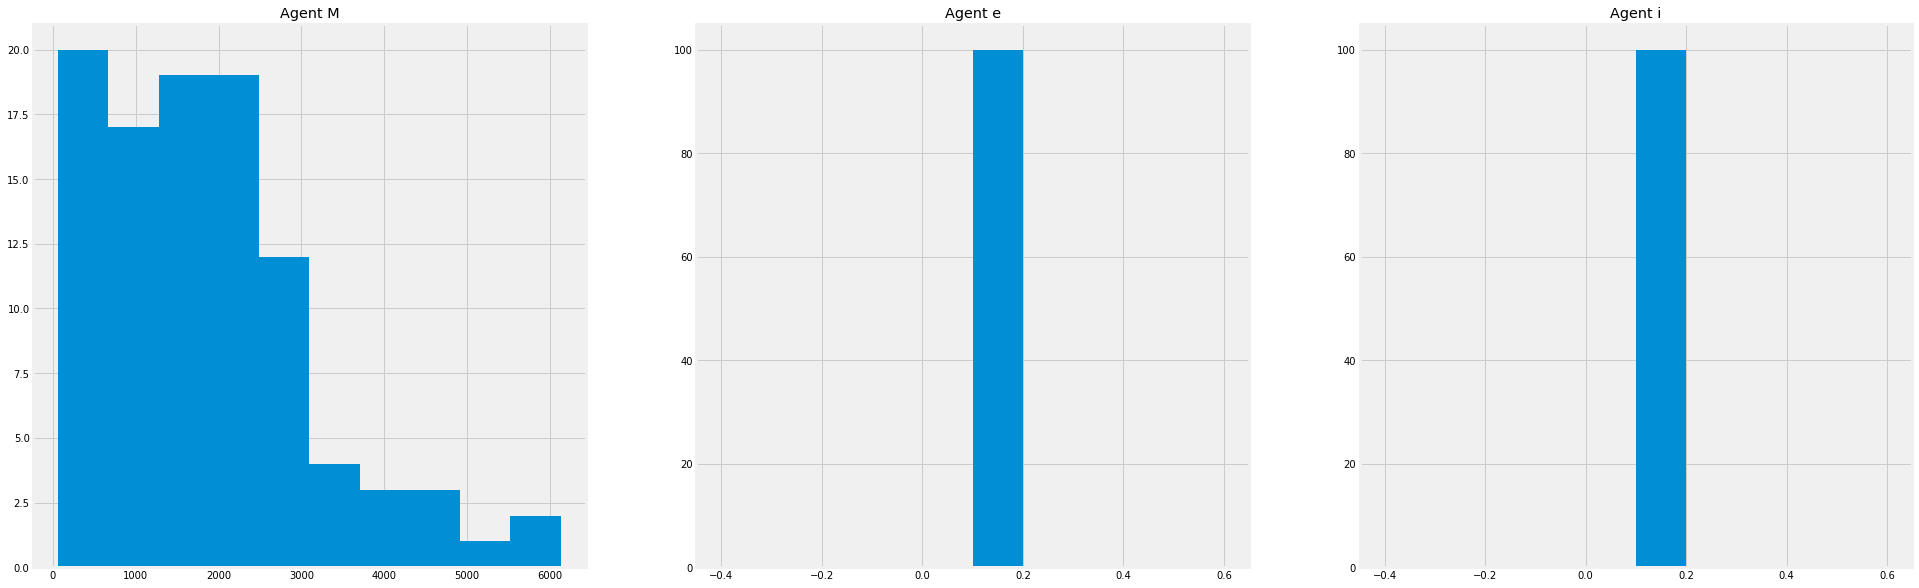

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 231.0, Temptation: 256.0, Sucker: -26.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 120.0, Temptation: 134.0, Sucker: -13.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 199.0, Temptation: 222.0, Sucker: -22.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 120.0, Temptation: 134.0, Sucker: -13.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 130.0, Temptation: 144.0, Sucker: -14.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 120.0, Temptation: 134

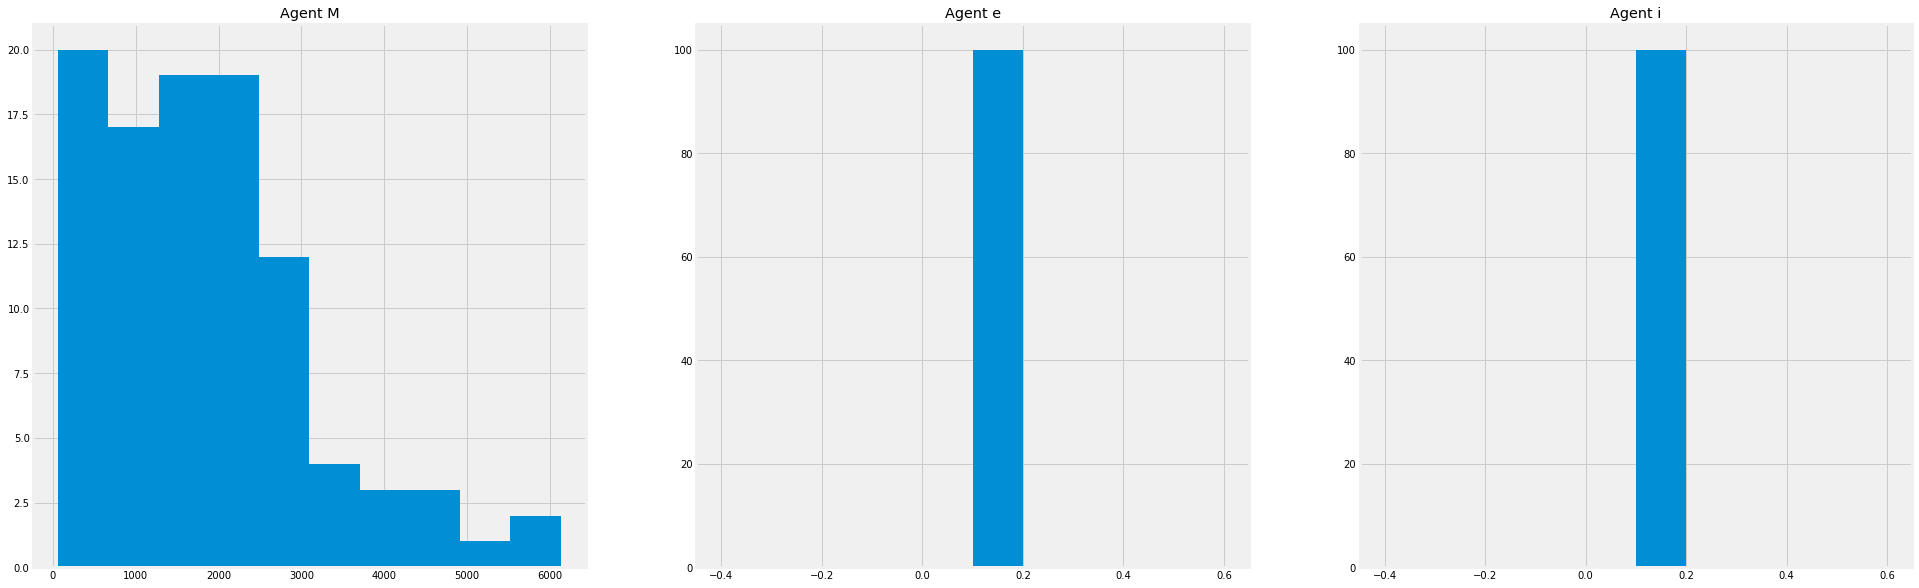

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 37 minutes.
    S.D.  Counts Seed
0    0.5     293   32
1    0.6     294   32
2    0.7     274   32
3    0.8     245   32
4    0.9     229   32
5    1.0     193   32
6    1.1     181   32
7    1.2     156   32
8    1.3     148   32
9    1.4     123   32
10   1.5     110   32
11   1.6      73   32
12   1.7      55   32
13   1.8      41   32
14   1.9      37   32
15   2.0      36   32
16   2.1      28   32
17   2.2      30   32
18   2.3      31   32
19   2.4      23   32
20   2.5      13   32
21   2.6       7   32
22   2.7       5   32
23   2.8       5   32
24   2.9       3   32
25   3.0       2   32


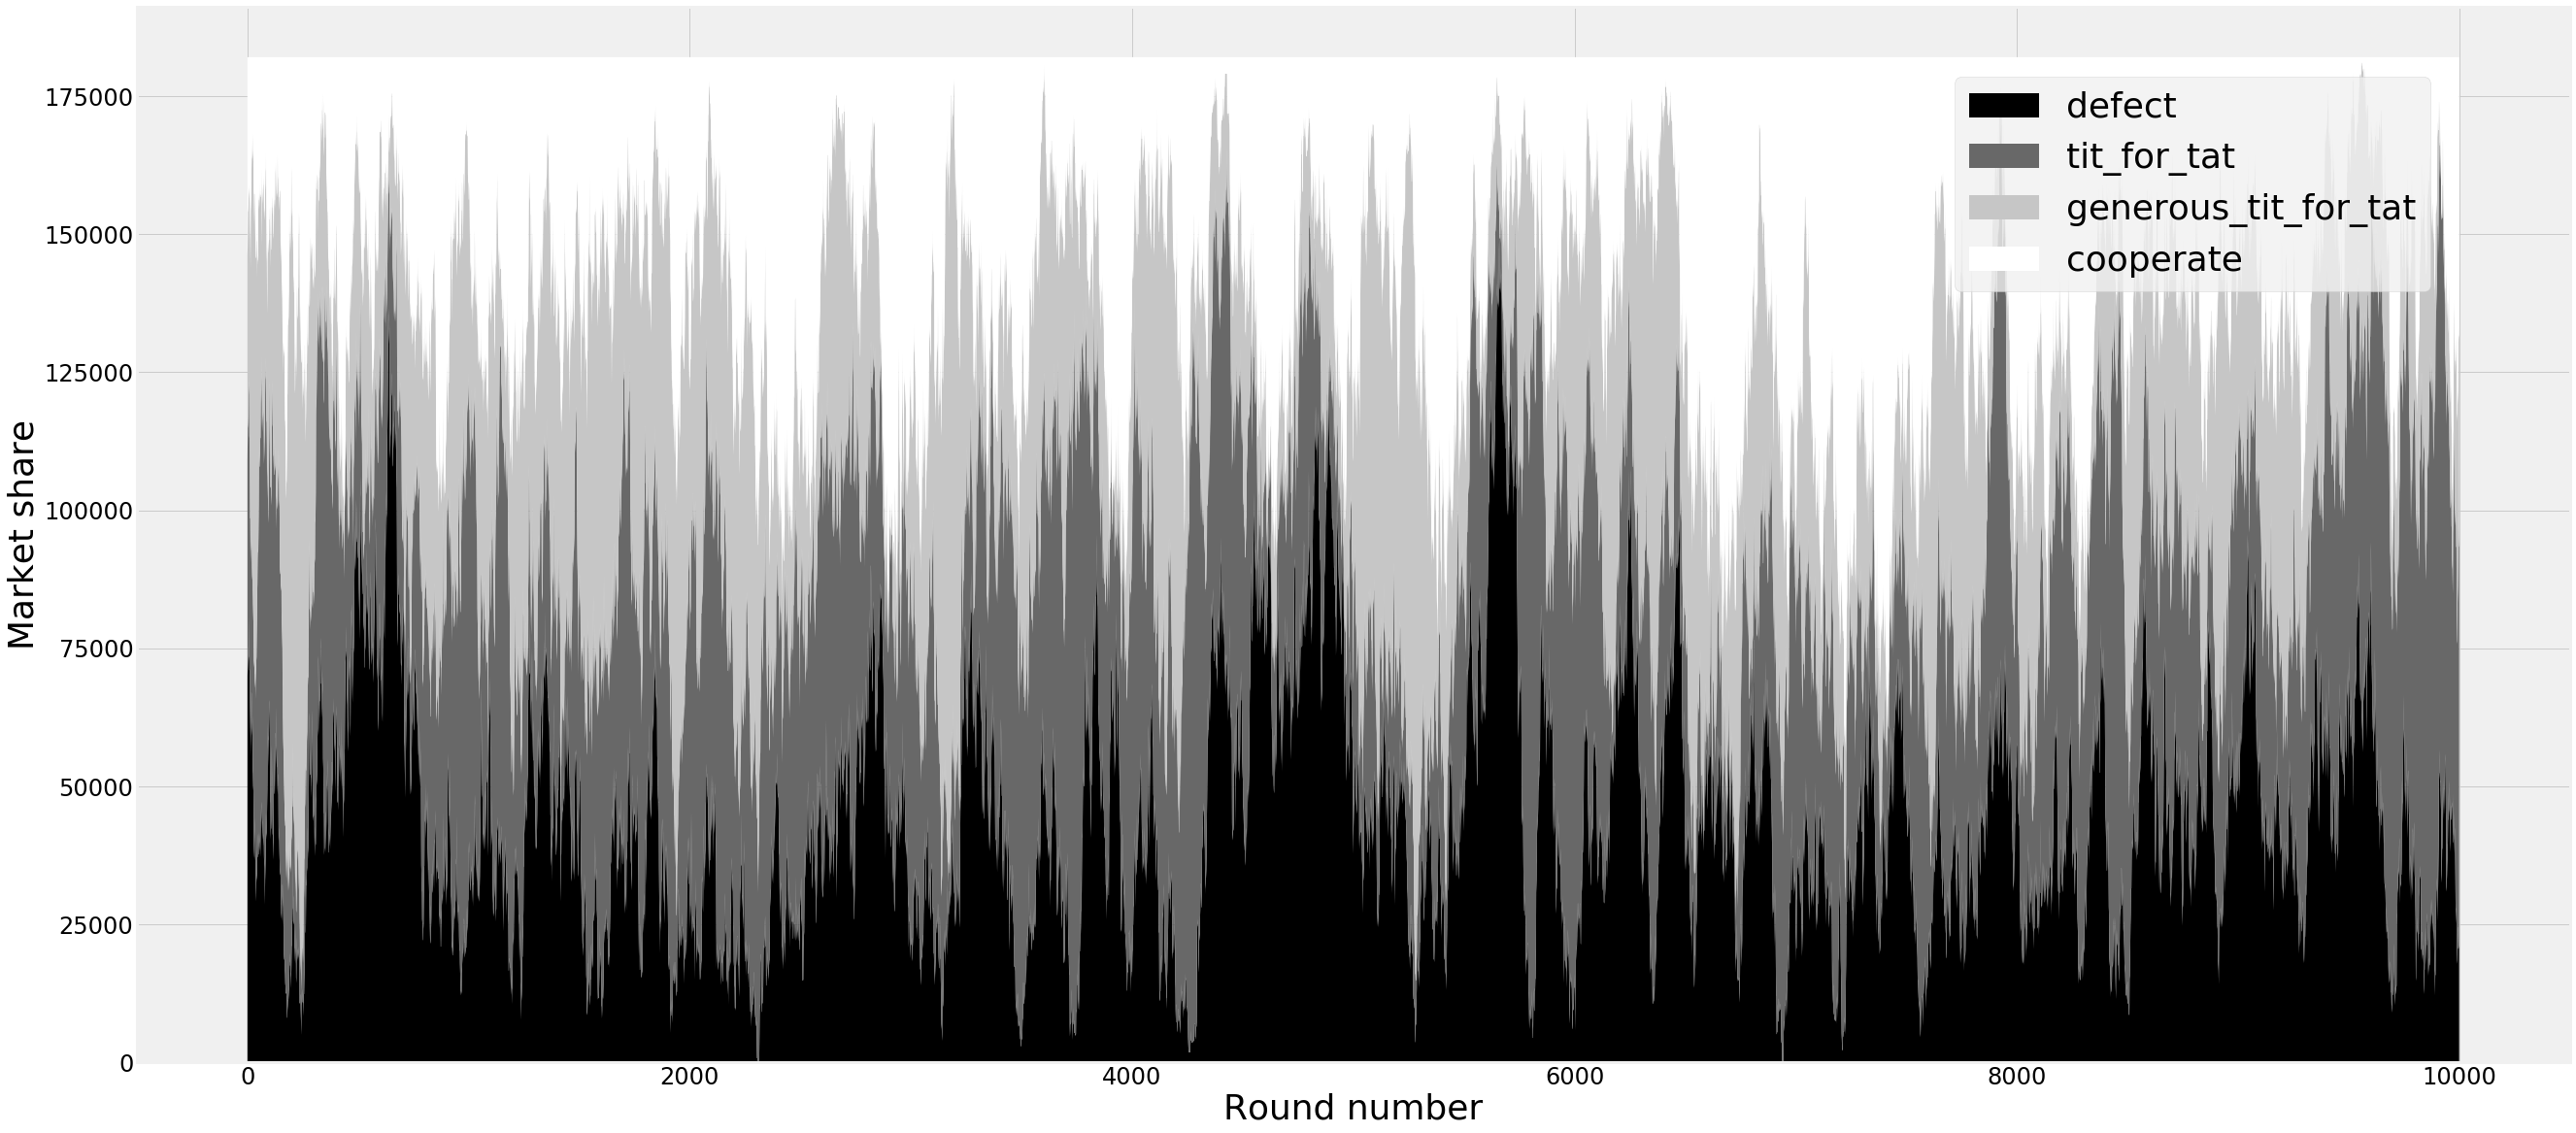

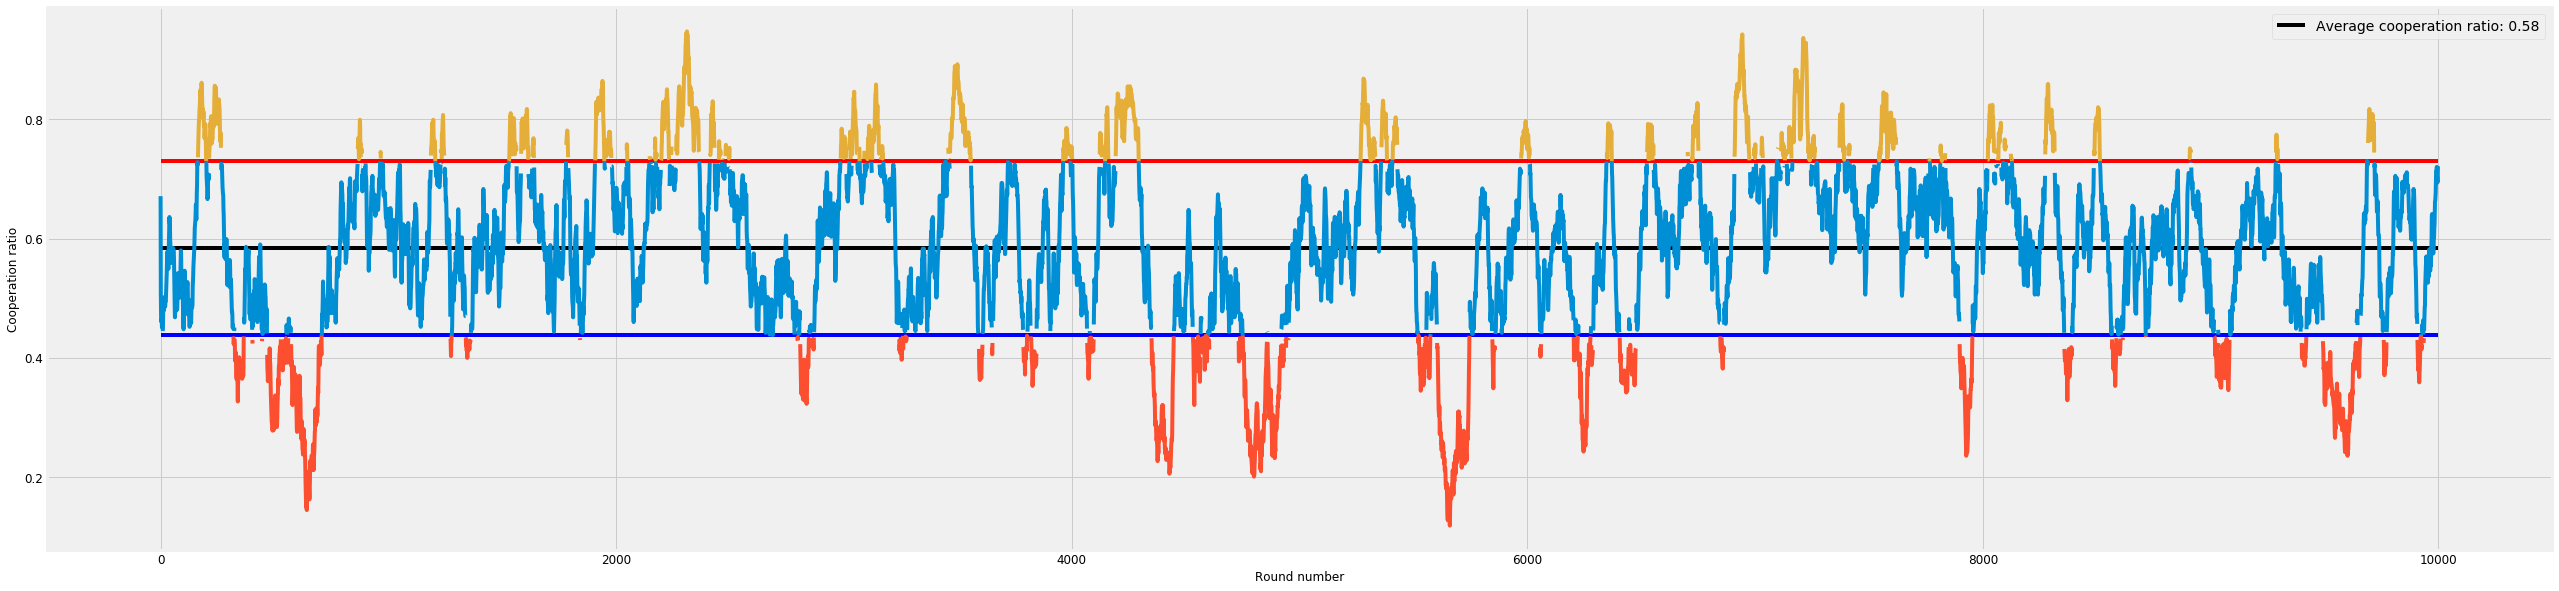

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdm", seed = str(seed))